In [ ]:
# Name : Vaibhav Raaj Singh
# Course : Bsc(H) Comp. Science
# Roll no : 205791
# Semester : VI
# Subject : Data Minining
# Topic : Practicals


Practical 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Q1. i) Create a file “people.txt" and read the data from the file “people.txt”.
data = pd.read_table("people.txt",sep='\t')

In [4]:
data

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [5]:
# ii) Create a ruleset E that contain rules to check for the following conditions:
# 1. The age should be in the range 0-150.
# 2. The age should be greater than yearsmarried.
# 3. The status should be married or single or widowed.
# 4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup
# should be adult, if age is more than 65 the agegroup should be elderly
def ruleset(data):
    data['rule1'] = data['Age'].apply(lambda x : True if x>0 and x< 150 else False)
    data['rule2'] = data.apply(lambda x :  True if x.Age > x.yearsmarried else False,axis = 1)    
    data['rule3'] = data['status'].apply(lambda x : True if x == "single" or x == "married" or x == "widowed"else False)    
    data['rule4'] = data.apply(lambda x : True if (x.agegroup == "child" and x.Age >0 and x.Age<18 ) or (x.agegroup == "adult" and x.Age >=18 and x.Age<65 ) or (x.agegroup == "elderly" and x.Age >65) else False ,axis = 1)
    return data

In [6]:
ruleset(data)

,Age,agegroup,height,status,yearsmarried,rule1,rule2,rule3,rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,False
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [25]:
# iii) Check whether ruleset E is violated by the data in the file people.txt.

violated = {
    "rule1" : data['rule1'].apply(lambda x : x == False).sum(),
    "rule2" : data['rule2'].apply(lambda x : x == False).sum(),
    "rule3" : data['rule3'].apply(lambda x : x == False).sum(),
    "rule4" : data['rule4'].apply(lambda x : x == False).sum()

}

In [47]:
# iv) Summarize the results obtained in part (iii)
violated_df = pd.DataFrame(violated,index = [0])
violated_df

,rule1,rule2,rule3,rule4
0,1,1,0,2


In [48]:
violated_df.describe()

,rule1,rule2,rule3,rule4
count,1.0,1.0,1.0,1.0
mean,1.0,1.0,0.0,2.0
std,NaN,NaN,NaN,NaN
min,1.0,1.0,0.0,2.0
25%,1.0,1.0,0.0,2.0
50%,1.0,1.0,0.0,2.0
75%,1.0,1.0,0.0,2.0
max,1.0,1.0,0.0,2.0


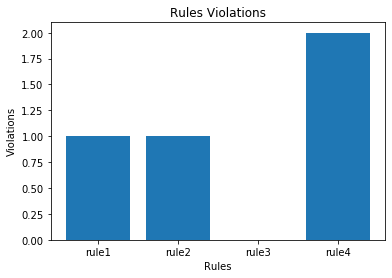

In [121]:
# v) Visualize the results obtained in part (iii)
rules = list(violated.keys())
violations = list(violated.values())
plt.bar(rules,violations)
plt.xlabel("Rules")
plt.ylabel("Violations")
plt.title("Rules Violations")
plt.show()